In [2]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [3]:
df = pd.read_csv(os.path.join('..', 'dataset', 'winequality-red.csv'))

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


A description of the dataset is as follows:

    fixed acidity in g/dm3
    volatile acidity in g/dm3
    citric acid in g/dm3
    residual sugar in g/dm3
    chlorides in g/dm3
    free sulfur dioxide in g/dm3
    total sulfur dioxide in g/dm3
    density in g/cm3
    pH
    sulphates in g/dm3
    alcohol in % vol.
    quality is the rating score

Quality is the dependent variable. 

Cleaning data
Checking for null and duplicated values in the dataset

In [5]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

240

In [9]:
df.drop_duplicates(inplace = True)

In [10]:
df.duplicated().sum()

0

Clean data frame

In [11]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


In [12]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

Exploratory Data Analysis

In [13]:
df.quality.max()

8

In [14]:
df.quality.min()

3

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [16]:
df.quality.median()

6.0

In [17]:
df[df.quality == df.quality.max()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.99760,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
481,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1120,7.9,0.54,0.34,2.5,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
1202,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8


In [18]:
df[df.quality == df.quality.min()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


Finding correlation

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


From the table above, alcohol, sulphates,citric acid, and fixed acidity are highly correlated with quality

In [20]:
df.var()

fixed acidity              3.017134
volatile acidity           0.033500
citric acid                0.038235
residual sugar             1.828752
chlorides                  0.002438
free sulfur dioxide      109.145456
total sulfur dioxide    1116.157653
density                    0.000003
pH                         0.024036
sulphates                  0.029127
alcohol                    1.170866
quality                    0.678281
dtype: float64

In [46]:
df.cov()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,3.017134,-0.081110,0.226692,0.260794,0.007366,-2.551078,-6.022271,0.002176,-0.184922,0.056405,-0.115772,0.170269
volatile acidity,-0.081110,0.033500,-0.019729,-0.000606,0.000498,-0.040050,0.438444,0.000008,0.007012,-0.008026,-0.039177,-0.059575
citric acid,0.226692,-0.019729,0.038235,0.038049,0.002029,-0.098065,0.309372,0.000131,-0.016683,0.010881,0.022239,0.036726
residual sugar,0.260794,-0.000606,0.038049,1.828752,0.001780,2.267926,9.082794,0.000820,-0.017432,-0.002732,0.092599,0.015192
chlorides,0.007366,0.000498,0.002029,0.001780,0.002438,0.000386,0.075509,0.000018,-0.002074,0.003325,-0.011959,-0.005327
free sulfur dioxide,-2.551078,-0.040050,-0.098065,2.267926,0.000386,109.145456,232.890476,-0.000353,0.091726,0.096508,-0.905779,-0.434189
total sulfur dioxide,-6.022271,0.438444,0.309372,9.082794,0.075509,232.890476,1116.157653,0.004879,-0.410519,0.201221,-7.874662,-4.893668
density,0.002176,0.000008,0.000131,0.000820,0.000018,-0.000353,0.004879,0.000003,-0.000103,0.000047,-0.001021,-0.000284
pH,-0.184922,0.007012,-0.016683,-0.017432,-0.002074,0.091726,-0.410519,-0.000103,0.024036,-0.005666,0.035803,-0.007054
sulphates,0.056405,-0.008026,0.010881,-0.002732,0.003325,0.096508,0.201221,0.000047,-0.005666,0.029127,0.016920,0.034976


Training/Test split

In [21]:
X = df.drop('quality', axis= 1)

In [22]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5


In [23]:
y = df.quality

In [24]:
y

0       5
1       5
2       5
3       6
5       5
6       5
       ..
1592    6
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [26]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

815
544
815
544


Working with training set

In [27]:
X_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.244760,0.654113,0.071225,0.075770,-0.139097,-0.112252,0.664807,-0.688402,0.160606,-0.104489
volatile acidity,-0.244760,1.000000,-0.540852,-0.004496,0.066624,-0.010796,0.107034,0.027575,0.221722,-0.262015,-0.215363
citric acid,0.654113,-0.540852,1.000000,0.121874,0.214296,-0.048809,0.029392,0.352485,-0.539240,0.321051,0.084627
residual sugar,0.071225,-0.004496,0.121874,1.000000,0.062722,0.222116,0.200118,0.323647,-0.064872,0.004675,0.025797
chlorides,0.075770,0.066624,0.214296,0.062722,1.000000,0.016007,0.068108,0.201403,-0.281624,0.413654,-0.213082
free sulfur dioxide,-0.139097,-0.010796,-0.048809,0.222116,0.016007,1.000000,0.672743,-0.003872,0.049050,0.031096,-0.107177
total sulfur dioxide,-0.112252,0.107034,0.029392,0.200118,0.068108,0.672743,1.000000,0.112434,-0.081603,0.003090,-0.282372
density,0.664807,0.027575,0.352485,0.323647,0.201403,-0.003872,0.112434,1.000000,-0.392424,0.142287,-0.553951
pH,-0.688402,0.221722,-0.539240,-0.064872,-0.281624,0.049050,-0.081603,-0.392424,1.000000,-0.196986,0.263080
sulphates,0.160606,-0.262015,0.321051,0.004675,0.413654,0.031096,0.003090,0.142287,-0.196986,1.000000,0.089126


Scatter plot for each of one of varialbe

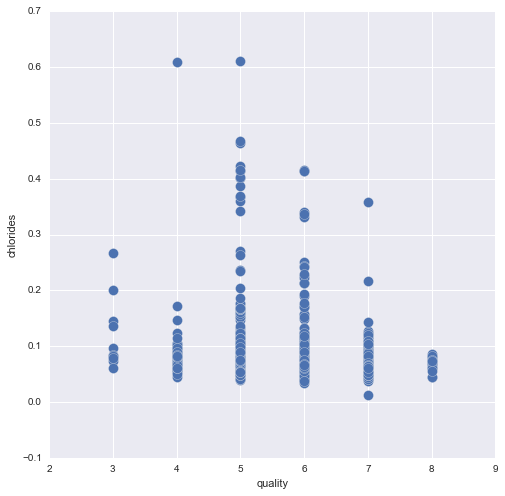

In [41]:
df[ ['quality', 'chlorides'] ].plot(kind = 'scatter', x = 'quality', y = 'chlorides', s = 100, figsize = (8, 8))
#df.plot(kind = 'scatter', x = 'quality', y = 'chlorides') gives the same plot

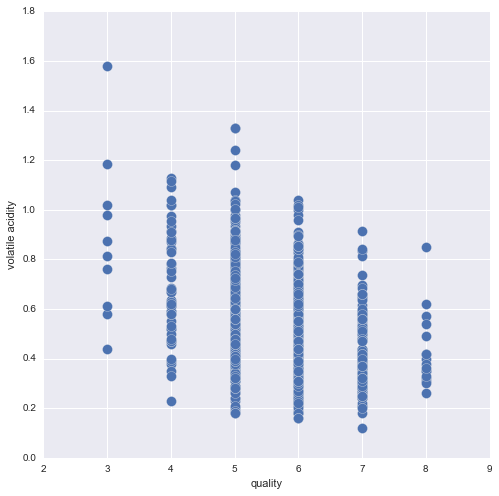

In [45]:
df[ ['quality', 'volatile acidity'] ].plot(kind = 'scatter', x = 'quality', y = 'volatile acidity', s = 100, figsize = (8, 8))

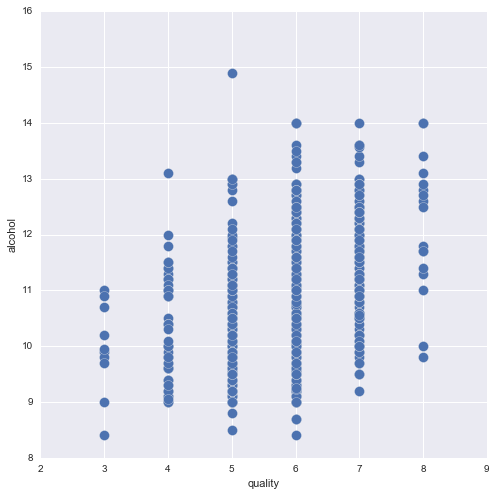

In [29]:
df[ ['quality', 'alcohol'] ].plot(kind = 'scatter', x = 'quality', y = 'alcohol', s = 100, figsize = (8, 8))

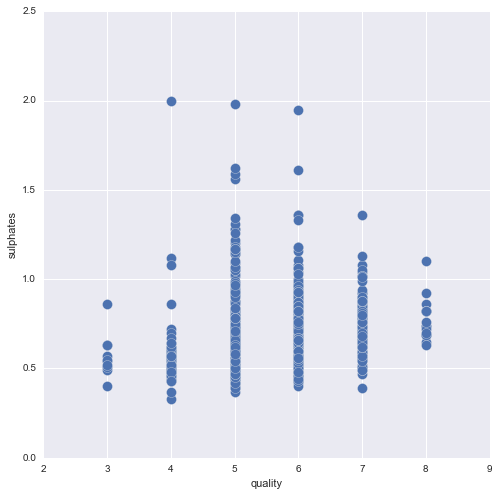

In [30]:
df[ ['quality', 'sulphates'] ].plot(kind = 'scatter', x = 'quality', y = 'sulphates', s = 100, figsize = (8, 8))

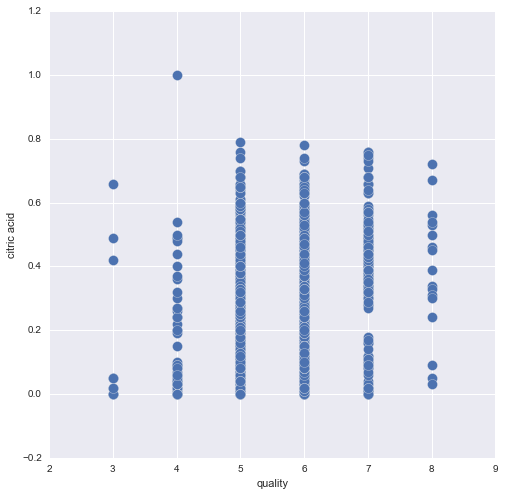

In [31]:
df[ ['quality', 'citric acid'] ].plot(kind = 'scatter', x = 'quality', y = 'citric acid', s = 100, figsize = (8, 8))

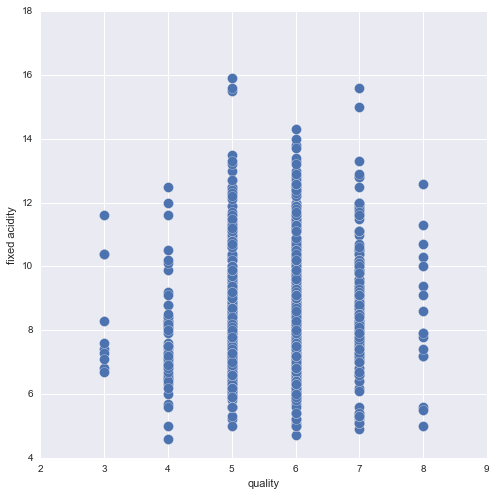

In [32]:
df[ ['quality', 'fixed acidity'] ].plot(kind = 'scatter', x = 'quality', y = 'fixed acidity', s = 100, figsize = (8, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cb974d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ccfa8d0>]], dtype=object)

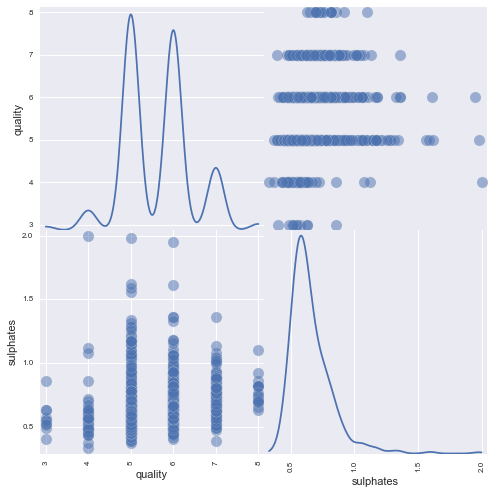

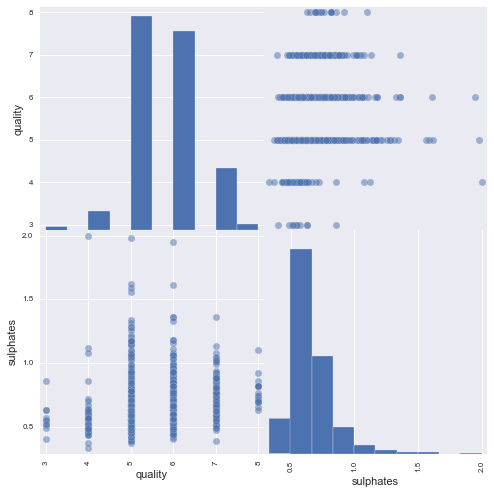

In [33]:
pd.tools.plotting.scatter_matrix(df[ ['quality', 'sulphates'] ], diagonal = 'kde', s = 500, figsize = (8, 8))
pd.tools.plotting.scatter_matrix(df[ ['quality', 'sulphates'] ], s = 200, figsize = (8, 8))

In [34]:
#check for outliers

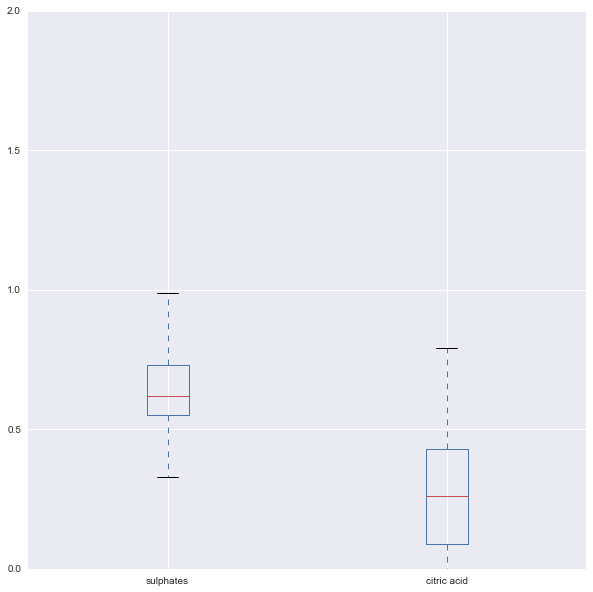

In [35]:
df[ ['sulphates', 'citric acid'] ].plot(kind = 'box', figsize = (10, 10))

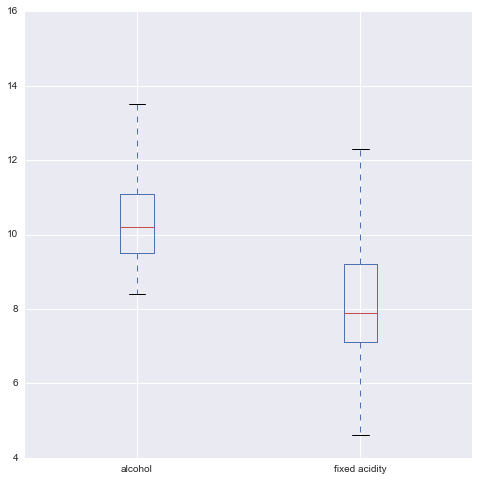

In [36]:
df[ ['alcohol', 'fixed acidity'] ].plot(kind = 'box', figsize = (8, 8))

In [37]:
model = smf.ols(formula = 'quality ~ sulphates', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     89.57
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           1.26e-20
Time:                        12:59:21   Log-Likelihood:                -1620.6
No. Observations:                1359   AIC:                             3245.
Df Residuals:                    1357   BIC:                             3256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.8323      0.086     55.973      0.000         4.663     5.002
sulphates      1.2008      0.127      9.464      0.000         0.952     1.450
==============================================================================
Omnibus:                       10.836   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.169
Skew:                           0.051   Prob(JB):                     0.000508
Kurtosis:                       3.507   Cond. No.                         8.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
def Xy(df):
    X = df[ ['alcohol'] ] # X is a DataFrame

    y = df.quality # y is a Series

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 7.750e+04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        12:59:21   Log-Likelihood:                -1529.7
No. Observations:                1359   AIC:                             3061.
Df Residuals:                    1358   BIC:                             3067.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
alcohol        0.5372      0.002    278.388      0.000         0.533     0.541
==============================================================================
Omnibus:                       70.438   Durbin-Watson:                   1.732
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.228
Skew:                          -0.384   Prob(JB):                     3.89e-28
Kurtosis:                       4.280   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
def Xy(df):
    X = df[ ['sulphates'] ] # X is a DataFrame

    y = df.quality # y is a Series

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 27 Oct 2016   Prob (F-statistic):               0.00
Time:                        12:59:21   Log-Likelihood:                -2433.7
No. Observations:                1359   AIC:                             4869.
Df Residuals:                    1358   BIC:                             4875.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
sulphates      8.0757      0.058    139.611      0.000         7.962     8.189
==============================================================================
Omnibus:                      816.506   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11174.349
Skew:                          -2.546   Prob(JB):                         0.00
Kurtosis:                      16.092   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model = smf.ols(formula = 'quality ~ alcohol', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     407.0
Date:                Thu, 27 Oct 2016   Prob (F-statistic):           2.28e-79
Time:                        12:59:21   Log-Likelihood:                -1485.8
No. Observations:                1359   AIC:                             2976.
Df Residuals:                    1357   BIC:                             2986.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.8092      0.190      9.519      0.000         1.436     2.182
alcohol        0.3656      0.018     20.174      0.000         0.330     0.401
==============================================================================
Omnibus:                       40.387   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.401
Skew:                          -0.210   Prob(JB):                     6.98e-17
Kurtosis:                       4.067   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model_8 = linear_model.LogisticRegression().\
    fit(X, cs.8)

print model_8.coef_
print model_8.intercept_